## Muhammad Hazim Al Farouq
## 1906400103

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, color, filters, util
from skimage.morphology import disk, ball, white_tophat
from skimage.segmentation import slic, mark_boundaries
from skimage.exposure import adjust_gamma
from skimage import img_as_ubyte

# 1. Thresholding [50]


### a. [10] Lakukan Simple Global Thresholding pada citra tersebut

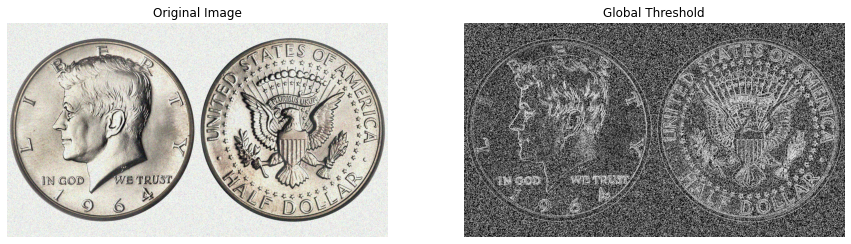

In [2]:
img = io.imread('Citra Tugas Lab 5/Citra Tugas Lab 5/noisy_coin.jpeg')
strel = disk(20)

gray = color.rgb2gray(img)
gray_sobel = filters.sobel(gray)
gray_sobel = img_as_ubyte(gray_sobel)
_,th1 = cv2.threshold(gray_sobel,30,255,cv2.THRESH_BINARY)

plt.figure(figsize=(15,7.5))
plt.subplot(121),plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(122),plt.imshow(th1,cmap = 'gray')
plt.title('Global Threshold')
plt.axis('off')
plt.show()



### b. [10] Lakukan Otsu’s Thresholding (beserta histogramnya) pada citra tersebut


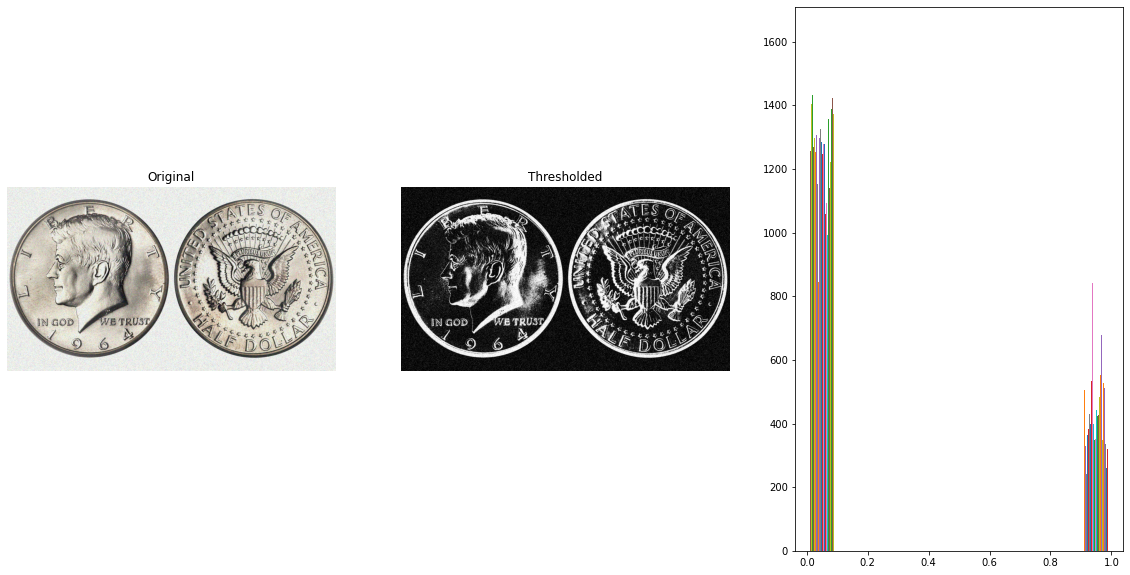

In [3]:
img2 = io.imread('Citra Tugas Lab 5/Citra Tugas Lab 5/noisy_coin.jpeg')
G = util.img_as_ubyte(color.rgb2gray(img2))
T = filters.threshold_otsu(G)
S = util.img_as_float(G>T)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(img2)
plt.title('Original'); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(1-S, cmap='gray')
plt.title("Thresholded"); plt.axis("off")
plt.subplot(1,3,3); plt.hist(1-S)

plt.show()



### c. [15] Jelaskan perbedaan hasil dari simple global thresholding pada (a) dan Otsu’s Thresholding pada (b) dan alasan mengapa perbedaan tersebut bisa terjadi.


Simple global thresholding menghasilkan hasil segmentasi yang lebih buram dibandingkan dengan hasil segmentasi dari otsu's thresholding. Hal ini bisa terjadi karena otsu bisa mencari titik threshold yang optimal antar kelas sehingga citra bisa di segmentasi dengan lebih baik.

### d. [15] Tentukan metode mana yang lebih optimal untuk citra ini dan mengapa?


Menurut saya metode yang lebih optimal adalah metode otsu, hal ini karena pada metode otsu sudah dengan otomatis mencari threshold yang optimal sehingga bisa meminimalkan value satu kelas dan memaksimalkan value antar kelas. Sehingga dengan otsu thresholding, area-area yang di segmentasi menjadi lebih jelas.

# 2. Clustering [50]

### a. [10] Gunakan algoritma SLIC untuk melakukan segmentasi dengan variasi jumlah segmen 10, 50,dan 100.


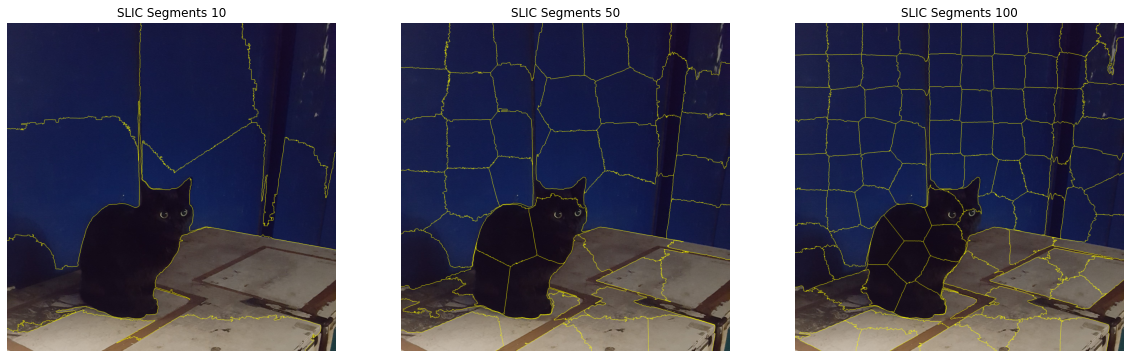

In [4]:
cat = io.imread('Citra Tugas Lab 5/Citra Tugas Lab 5/cat.jpg')
segments = [10,50,100]
plt.figure(figsize=(20,10))

segments_slic_10 = slic(cat, n_segments=10, compactness=10, sigma=1)
segments_slic_50 = slic(cat, n_segments=50, compactness=10, sigma=1)
segments_slic_100 = slic(cat, n_segments=100, compactness=10, sigma=1)

# print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
plt.subplot(1,3,1)
plt.imshow(mark_boundaries(cat, segments_slic_10));plt.title('SLIC Segments 10');plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(mark_boundaries(cat, segments_slic_50));plt.title('SLIC Segments 50');plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(mark_boundaries(cat, segments_slic_100));plt.title('SLIC Segments 100');plt.axis('off')
plt.show()


### b. [10] Visualisasikan hasil (a) dalam bentuk penyeragaman piksel untuk setiap superpiksel yang telah disegmentasi. Gunakan nilai median untuk memilih piksel yang dipilih untuk setiap superpiksel.

In [5]:
def superpixel_median_image(image, slic_labels):
    """
    Code taken from https://stackoverflow.com/a/57746835
    Turn image into superpixel image, given SLIC segment
    labels.
    """
    im_rp = image.reshape((image.shape[0]*image.shape[1], image.shape[2]))
    sli_1d = np.reshape(slic_labels, -1)
    uni = np.unique(sli_1d)
    new_img = np.zeros(im_rp.shape)
    for i in uni:
        loc=np.where(sli_1d==i)[0]
        mm=np.median(im_rp[loc,:],axis=0)
        new_img[loc,:] = mm
    return np.reshape(new_img, [image.shape[0], image.shape[1], image.shape[2]]).astype('uint8')


    


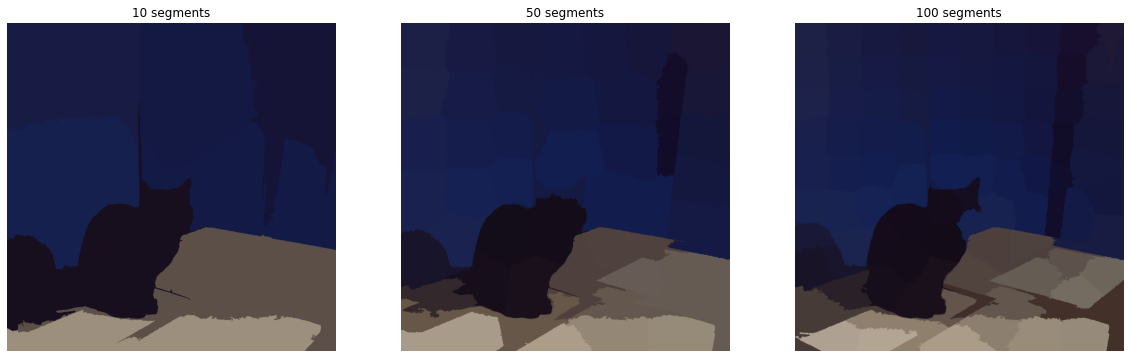

In [6]:
superpixel_image_10 = superpixel_median_image(cat, segments_slic_10)
superpixel_image_50 = superpixel_median_image(cat, segments_slic_50)
superpixel_image_100 = superpixel_median_image(cat, segments_slic_100)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(superpixel_image_10)
plt.title('10 segments'); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(superpixel_image_50)
plt.title("50 segments"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(superpixel_image_100)
plt.title("100 segments"); plt.axis("off")

plt.show()

### c. [5] Berdasarkan hasil visualisasi (b), apa pengaruh jumlah segmen terhadap hasil segmentasi? Menurut anda, berapa jumlah segmen yang memberikan hasil terbaik?


Semakin banyak jumlah segmen, maka hasil visualisasi akan semakin jelas dalam melakukan segmentasi. Bisa dilihat mesikipun saat segmen 100 gambar kucing kurang sempurna, tapi citra mampu men-segmentasi bayangan dari si kucing dan lantai-lantai yang cukup gelap dengan baik. Jumlah segmen yang memberikan hasil terbaik adalah kurang lebih 250 segmen.

### d. [7.5] Lakukan konversi citra “cat.jpg” ke dalam color space LAB. Kemudian, lakukan gamma correction pada channel L. (petunjuk: anda dapat menggunakan skimage.exposure.adjust_gamma. Gunakan nilai gamma sebesar 1.15)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


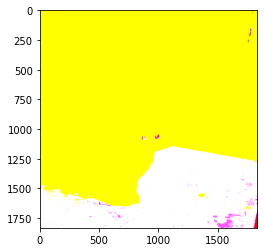

In [7]:
cat_lab = color.rgb2lab(cat)
L = cat_lab[:,:,0]
A = cat_lab[:,:,1]
B = cat_lab[:,:,2]
# plt.imshow(cat_lab)
L2 = adjust_gamma(L, gamma=1.15)

cat_lab[:,:,0] = L2
plt.imshow(cat_lab)


### e. [7.5] Lakukan konversi citra yang diperoleh dari (d) kembali ke dalam color space RGB. Kemudian, lakukan segmentasi menggunakan algoritma SLIC dengan jumlah segmen 100. (petunjuk: pastikan tipe data citra anda adalah uint8 sebelum melakukan segmentasi dengan SLIC)

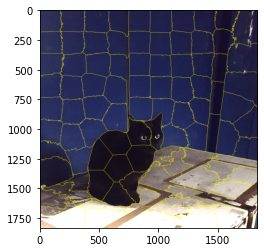

In [8]:
cat_new = color.lab2rgb(cat_lab)
cat_new = img_as_ubyte(cat_new)
segments_slic_100_new = slic(cat_new, n_segments=100, compactness=10, sigma=1)
plt.imshow(mark_boundaries(cat_new, segments_slic_100_new))

### f. [10] Lakukan penyeragaman piksel pada hasil (e) seperti yang anda lakukan pada (b). Bandingkan hasilnya dengan hasil (b) dengan jumlah segmen 100. Apakah terdapat perbedaan pada hasil segmentasi? Jika ya, dapatkah anda jelaskan mengapa?


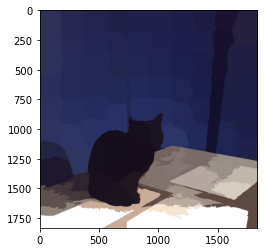

In [9]:
superpixel_cat_new_100 = superpixel_median_image(cat_new, segments_slic_100_new)
plt.imshow(superpixel_cat_new_100)

Ya, terdapat perbedaan, hasil segmentasi pada point f lebih baik daripada hasil segmentasi pada poin b dengan jumlah segmen sama-sama 100. Hal ini dikarenakan image yang digunakan pada point f melakukan gamma correction pada channel L yang mengakibatkan gambar tersebut menjadi lebih terang dibandingkan dengan gambar sebelumnya. Sehingga, bayangan dari kucing, wajah dari kucing, dan bentuk lantai menjadi terlihat lebih jelas. Akibatnya, hanya dengan 100 segmen citra bisa melakukan segmentasi dengan cukup baik.

(-0.5, 1831.5, 1831.5, -0.5)

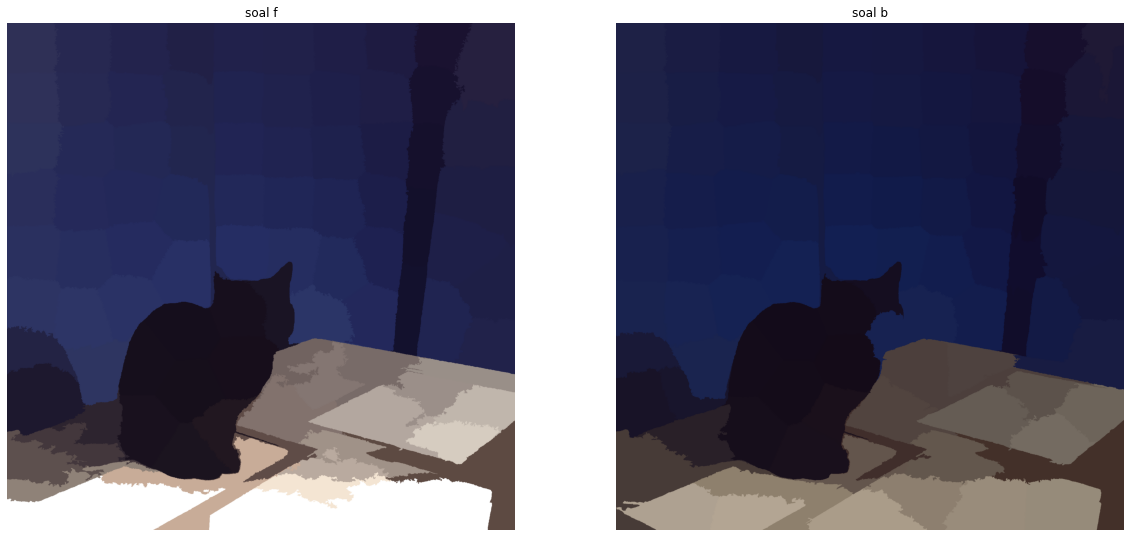

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(superpixel_cat_new_100);plt.title('soal f');plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(superpixel_image_100);plt.title('soal b');plt.axis('off')